In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import glob

In [4]:
def show_element(l):
    '''リストを綺麗に表示させる
    使用メリット：リストのインデックスが見やすい

    パラメータ：リスト

    '''
    for i,e in enumerate(l):
        print(f'{i}:{e}')

def get_filename(path):

    ''' pathからファイル名のみを抽出
    使用メリット：タイトルなどにファイル名を表示させることで、データの取違いを防げる

    パラメータ：パスの文字列

    '''

#     ファイル名の読み込み
    basename = os.path.basename(path)
    basename_without_ext = os.path.splitext(basename)[0]
    return basename_without_ext

In [10]:
cd = glob.glob("./*.xls") #カレントディレクトリに合わせる
#selected_cd = cd[0] #選択
#excel_file = glob.glob(selected_cd + "*.xlsx") #Excelファイルのみ選択

In [11]:
show_element(cd)

0:.\A1_FET - Clarius.xls
1:.\A2_FET - Clarius.xls
2:.\A3_FET - Clarius.xls
3:.\A4_FET - Clarius.xls
4:.\B2_FET - Clarius.xls
5:.\B3_FET - Clarius.xls
6:.\C1_FET - Clarius.xls
7:.\C2_FET - Clarius.xls
8:.\C4_FET - Clarius.xls
9:.\D1_FET - Clarius.xls
10:.\D2_FET - Clarius.xls
11:.\D3_FET - Clarius.xls
12:.\B2_output_FET - Clarius.xls


In [17]:
selected_excel_file = cd[0] #好きなやつを選択

In [18]:
if selected_excel_file.endswith('.xlsx'):
  df = pd.read_excel(selected_excel_file, engine='openpyxl')
elif selected_excel_file.endswith('.xls'):
  df = pd.read_excel(selected_excel_file, engine='xlrd')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


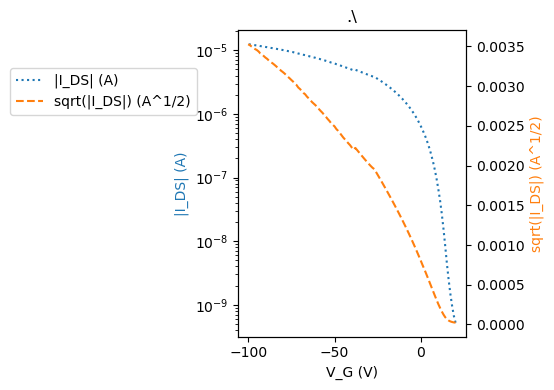

In [42]:
# 4列目をx，1列目をyとしてグラフにプロット
x = df.iloc[:, 3]  # 4列目
y = df.iloc[:, 0]  # 1列目

# yの値が負である場合、絶対値を取得
y = y.abs()

# yの平方根を計算
y_sqrt = np.sqrt(y)


# グラフの形状を3:2に設定
fig_width = 6.0
fig_height = 4.0
fig, ax1 = plt.subplots(figsize=(fig_width, fig_height))

ax1.plot(x, y, label='|I_DS| (A)', color='tab:blue', linestyle=':')
ax1.set_xlabel('V_G (V)')
ax1.set_ylabel('|I_DS| (A)', color='tab:blue')
ax1.set_yscale('log')  # 左軸を対数スケールに設定

# エクセルファイル名の最初の2文字をグラフタイトルに設定
graph_title = selected_excel_file[:2]
ax1.set_title(f'{graph_title}')

ax2 = ax1.twinx()
ax2.plot(x, y_sqrt, label='sqrt(|I_DS|) (A^1/2)', color='tab:orange', linestyle='--')  # 破線に設定
ax2.set_ylabel('sqrt(|I_DS|) (A^1/2)', color='tab:orange')
ax2.set_yscale('linear')  # 右軸を線形スケールに設定

# 凡例をグラフの左外側に表示
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax2.legend(lines, labels, loc='upper right', bbox_to_anchor=(-0.15, 0.9))  # 凡例を左側に表示

# グラフの余白を調整して軸ラベルが見切れないようにする
fig.tight_layout()

# エクセルファイル名を取得し、同じ名前で最初のグラフを保存

plt.show()


移動度は 0.0172です．
閾値電圧は 20.9 Vです．


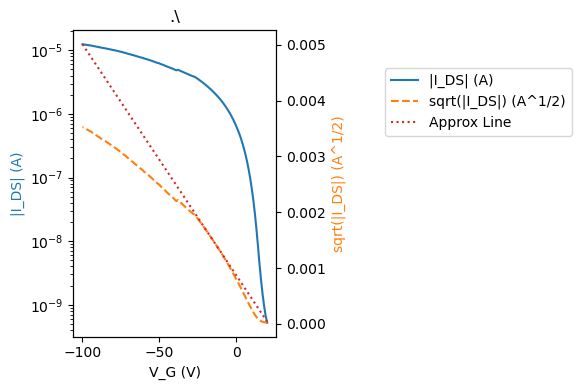

In [48]:

# ユーザーにx
x_min, x_max = -20, -10
L = 50 #um チャネル長
W = 1000 #um 電極幅
Ci = 1e-4 #F/m^2 単位面積当たりの誘電率

mask = (x >= x_min) & (x <= x_max)
x_subset = x[mask]
y_sqrt_subset = y_sqrt[mask]
slope, intercept, _, _, _ = linregress(x_subset, y_sqrt_subset)
approx_line = slope * x + intercept
V_th = - intercept / slope
mu = (2 * L * slope ** 2 * 10000) / (Ci * W)

# 二度目のグラフを作成し、近似直線を追加して表示
fig2, ax1 = plt.subplots(figsize=(8, 4))
ax2 = ax1.twinx()

ax1.plot(x, y, label='|I_DS| (A)', color='tab:blue')
ax2.plot(x, y_sqrt, label='sqrt(|I_DS|) (A^1/2)', color='tab:orange', linestyle='--')  # 破線に設定
ax2.plot(x, approx_line, label='Approx Line', color='tab:red', linestyle=':')  # 近似直線を追加


ax1.set_xlabel('V_G (V)')
ax1.set_ylabel('|I_DS| (A)', color='tab:blue')
ax1.set_yscale('log')  # 左軸を対数スケールに設定
ax1.set_title(f'{graph_title}')

ax2.set_ylabel('sqrt(|I_DS|) (A^1/2)', color='tab:orange')
ax2.set_yscale('linear')  # 右軸を線形スケールに設定

# 凡例をグラフの左外側に表示
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.5, 0.9))  # 凡例を左側に表示

# グラフの余白を調整して軸ラベルが見切れないようにする
fig2.tight_layout()
print(f"移動度は{mu: .3g}です．")
print(f"閾値電圧は{V_th: .1f} Vです．")